In [189]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Create a simple dataset
data = {
    'Ear shape': ['Pointy', 'Floppy', 'Floppy', 'Pointy', 'Pointy', 'Pointy', 'Floppy', 'Pointy', 'Floppy', 'Floppy'],
    'Face shape': ['Round', 'Not round', 'Round', 'Not round', 'Round', 'Round', 'Not round', 'Round', 'Round', 'Round'],
    'Whiskers': ['Present', 'Present', 'Absent', 'Present', 'Present', 'Absent', 'Absent', 'Absent', 'Absent', 'Absent'],
    'Weight': [7.2, 8.8, 15, 9.2, 8.4, 7.6, 11, 10.2, 18, 20],
    'Cat': [1, 1, 0, 0, 1, 1, 0, 1, 0, 0]
}
df = pd.DataFrame(data)
df



,Ear shape,Face shape,Whiskers,Weight,Cat
0,Pointy,Round,Present,7.2,1
1,Floppy,Not round,Present,8.8,1
2,Floppy,Round,Absent,15.0,0
3,Pointy,Not round,Present,9.2,0
4,Pointy,Round,Present,8.4,1
5,Pointy,Round,Absent,7.6,1
6,Floppy,Not round,Absent,11.0,0
7,Pointy,Round,Absent,10.2,1
8,Floppy,Round,Absent,18.0,0
9,Floppy,Round,Absent,20.0,0


In [190]:
# Specify columns for one-hot encoding
categorical_columns = ["Ear shape", "Face shape", "Whiskers"]

# Create ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("binary", OrdinalEncoder(), categorical_columns)
    ],
    remainder="passthrough"  # Keep other columns as-is
)


In [191]:
# Transform the data
transformed_data = preprocessor.fit_transform(df)

# Convert the result to a DataFrame
column_names = (
    preprocessor.named_transformers_["binary"].get_feature_names_out(categorical_columns).tolist()
    + ["Weight", "Cat"]
)
result = pd.DataFrame(transformed_data, columns=column_names)

result


,Ear shape,Face shape,Whiskers,Weight,Cat
0,1.0,1.0,1.0,7.2,1.0
1,0.0,0.0,1.0,8.8,1.0
2,0.0,1.0,0.0,15.0,0.0
3,1.0,0.0,1.0,9.2,0.0
4,1.0,1.0,1.0,8.4,1.0
5,1.0,1.0,0.0,7.6,1.0
6,0.0,0.0,0.0,11.0,0.0
7,1.0,1.0,0.0,10.2,1.0
8,0.0,1.0,0.0,18.0,0.0
9,0.0,1.0,0.0,20.0,0.0


In [192]:
# Step 4: Combine with the target variable
X = result[['Ear shape', 'Face shape', 'Whiskers']]
y = df['Weight']

In [193]:
# Step 5: Create and train the Decision Tree Classifier with Entropy
model = DecisionTreeRegressor(criterion='squared_error', max_depth=2)
model.fit(X, y)


DecisionTreeRegressor(max_depth=2)

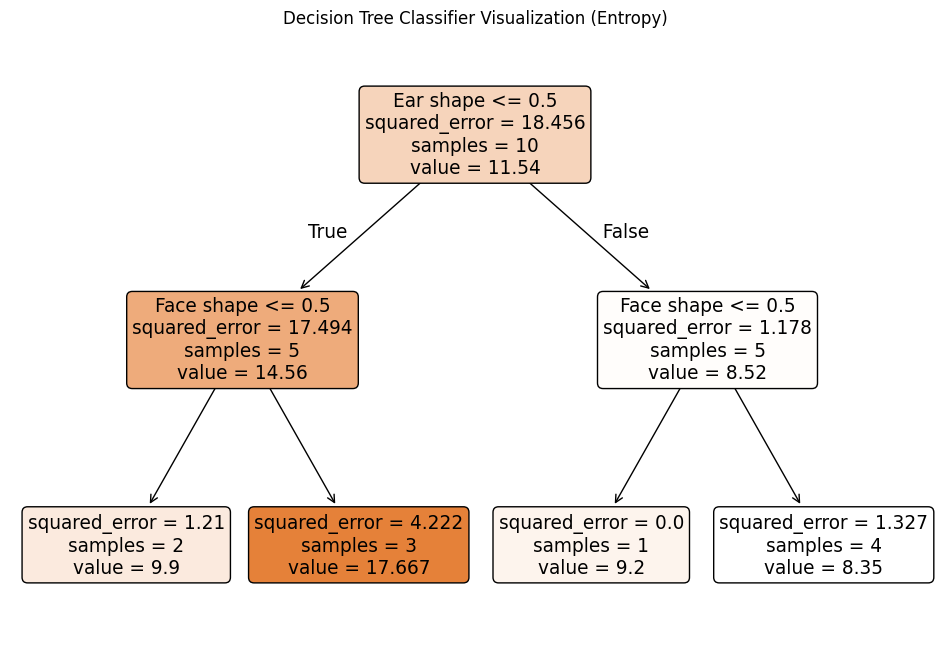

In [194]:
# Step 6: Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True)
plt.title("Decision Tree Classifier Visualization (Entropy)")
plt.show()


In [195]:
def calculate_entropy(class_counts):
    """
    Calculate the entropy of a dataset.

    Parameters:
        class_counts (list or array): The counts or probabilities of each class.

    Returns:
        float: The calculated entropy.
    """
    # Convert counts to probabilities if they aren't already
    total = sum(class_counts)
    probabilities = [count / total for count in class_counts]
    
    # Compute entropy
    entropy = -sum(p * np.log2(p) if p > 0 else 0 for p in probabilities)
    
    return entropy

def H(p1):
    entropy = -p1 * np.log2(p1) - (1 - p1) * np.log2(1 - p1)
    return entropy


